<html>
    <p style='background:#7B2B5D; color:#F79A23; font-size:20px; padding:10px;'><b>TP Smart Sensors : Apprentissage machine sur des données d’usinage
 </b></p>
</html>

<html>
    <p style='background:#FCDEB6; color:#7B2B5D; font-size:20px; padding:10px;'><b> Réalisé par : Mourad IZEM
        </b></p>
</html>

## PARTIE III
Dans cette partie, nous allons essayer : 
- de prédire la rugosité en connaissant le nombre de coupes déjà effectuées.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('data_capteurs.csv')
df= df.drop(['Unnamed: 0'],axis=1)
lst=[]
for i in range(1,169+1):
    lst.append(i)
df['nb_trous']=lst
df.head()

,P(x),P(y),D_In,D_In_max,D_In_min,D_Out,D_Out_max,D_Out_min,D_Cyl,D_Cyl_max,...,Max_F_T2&T3,Max_F_T3&T4,Moy_M_T1&T2,Moy_M_T2&T3,Moy_M_T3&T4,Max_M_T1&T2,Max_M_T2&T3,Max_M_T3&T4,Et_Consommee,nb_trous
0,0,0,6361.101,6390.165,6337.091,6356.137,6379.951,6331.168,6360.885,6386.484880,...,60.192380,57.846468,0.039393,0.166414,0.224184,0.060992,0.265538,0.364416,203.421139,1
1,0,-14800,6360.422,6382.916,6336.803,6356.971,6385.830,6328.615,6361.655,6385.525948,...,68.722535,63.219992,0.042361,0.233616,0.338397,0.055130,0.404222,0.509717,311.625602,2
2,0,-29600,6361.120,6380.387,6342.378,6355.782,6368.560,6346.285,6361.503,6384.172075,...,74.660174,69.274525,0.044052,0.270518,0.380102,0.058972,0.471183,0.541733,346.459683,3
3,0,-44400,6361.548,6387.460,6335.587,6356.731,6374.355,6340.531,6362.440,6392.826233,...,80.390653,69.841536,0.046448,0.307440,0.406943,0.065431,0.506979,0.561767,365.956399,4
4,0,-59200,6361.723,6388.822,6333.843,6357.077,6380.657,6335.277,6362.719,6391.846588,...,86.261302,74.098430,0.048299,0.310324,0.421348,0.066481,0.517174,0.561583,385.516179,5


In [2]:
df.columns

Index(['P(x)', 'P(y)', 'D_In', 'D_In_max', 'D_In_min', 'D_Out', 'D_Out_max',
       'D_Out_min', 'D_Cyl', 'D_Cyl_max', 'D_Cyl_min', 'Rz_In_max', 'Rz_In',
       'Rz_Out_max', 'Rz_Out', 'Rz_Cyl_max', 'Rz_Cyl', 'Rt_In', 'Rt_Out',
       'Rt_Cyl', 'Rq_In', 'Rq_Out', 'Rq_Cyl', 'Ra_In', 'Ra_Out', 'Ra_Cyl',
       'Moy_F_T1&T2', 'Moy_F_T2&T3', 'Moy_F_T3&T4', 'Max_F_T1&T2',
       'Max_F_T2&T3', 'Max_F_T3&T4', 'Moy_M_T1&T2', 'Moy_M_T2&T3',
       'Moy_M_T3&T4', 'Max_M_T1&T2', 'Max_M_T2&T3', 'Max_M_T3&T4',
       'Et_Consommee', 'nb_trous'],
      dtype='object')

In [3]:
df1 = df[['Rz_In_max', 'Rz_In',
       'Rz_Out_max', 'Rz_Out', 'Rz_Cyl_max', 'Rz_Cyl', 'Rt_In', 'Rt_Out',
       'Rt_Cyl', 'Rq_In', 'Rq_Out', 'Rq_Cyl', 'Ra_In', 'Ra_Out', 'Ra_Cyl', 'nb_trous']]
df.head()

,P(x),P(y),D_In,D_In_max,D_In_min,D_Out,D_Out_max,D_Out_min,D_Cyl,D_Cyl_max,...,Max_F_T2&T3,Max_F_T3&T4,Moy_M_T1&T2,Moy_M_T2&T3,Moy_M_T3&T4,Max_M_T1&T2,Max_M_T2&T3,Max_M_T3&T4,Et_Consommee,nb_trous
0,0,0,6361.101,6390.165,6337.091,6356.137,6379.951,6331.168,6360.885,6386.484880,...,60.192380,57.846468,0.039393,0.166414,0.224184,0.060992,0.265538,0.364416,203.421139,1
1,0,-14800,6360.422,6382.916,6336.803,6356.971,6385.830,6328.615,6361.655,6385.525948,...,68.722535,63.219992,0.042361,0.233616,0.338397,0.055130,0.404222,0.509717,311.625602,2
2,0,-29600,6361.120,6380.387,6342.378,6355.782,6368.560,6346.285,6361.503,6384.172075,...,74.660174,69.274525,0.044052,0.270518,0.380102,0.058972,0.471183,0.541733,346.459683,3
3,0,-44400,6361.548,6387.460,6335.587,6356.731,6374.355,6340.531,6362.440,6392.826233,...,80.390653,69.841536,0.046448,0.307440,0.406943,0.065431,0.506979,0.561767,365.956399,4
4,0,-59200,6361.723,6388.822,6333.843,6357.077,6380.657,6335.277,6362.719,6391.846588,...,86.261302,74.098430,0.048299,0.310324,0.421348,0.066481,0.517174,0.561583,385.516179,5


* <b><p>Ra : Écart moyen arithmétique du profil, Ra (JIS1982) : Déviation de la moyenne arithmétique de rugosité
(JIS1994, JIS2001, ISO1997, ANSI, VDA...)</b><br>
Ra est la moyenne arithmétique des valeurs absolues des déviations du profil d’évaluation (Yi) à partir de la ligne moyenne.</p><br>
* <b><p>Rq Écart moyen quadratique du profil </b><br>
Rq est la racine carrée de la moyenne arithmétique des carrés des déviations (Yi) de la ligne moyenne au profil d’évaluation.
</p><br>
* <b><p>Rz, Rmax, Ry  : Hauteur maximum du profil </b><br>
</p><br>


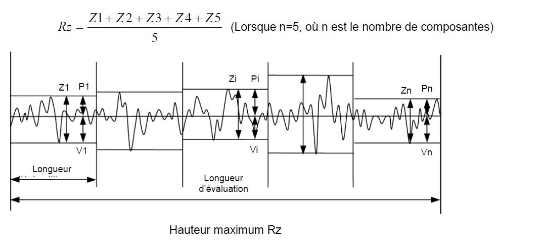

* <b><p>Rt : Rugosité maximum </b><br>
Rt est la somme de la distance de la ligne moyenne jusqu’au pic le plus élevé et la distance de la ligne moyenne jusqu’au fond le plus profond, pour toute la longueur d’évaluation.
</p><br>

In [4]:
d = df1.corr()
d['nb_trous'].sort_values(ascending = False)

nb_trous      1.000000
Ra_In         0.577060
Ra_Cyl        0.559252
Rz_Cyl        0.486750
Rq_Cyl        0.369150
Rt_Cyl        0.293462
Rz_Cyl_max    0.287990
Rz_In         0.286595
Rq_In         0.283300
Ra_Out        0.224860
Rq_Out        0.176892
Rz_Out        0.174505
Rz_Out_max    0.145917
Rt_Out        0.140534
Rt_In         0.094567
Rz_In_max     0.082177
Name: nb_trous, dtype: float64

- Dans cette partie nous allons essayer de prédire la rugosité arithmitique à l'entrée puisque c'est elle qui représente vraiment l'usure de l'outil; l'outil s'use au niveau de son extrémité et cela influence premièrement l'état de surface à l'entrée, cette rugosité est bien corrélée aussi avec le nb de rous effectués c'est qui est logique !! 

- Visualisation de Ra_In en fct du nb de trous 

Text(0, 0.5, 'Ra_In')

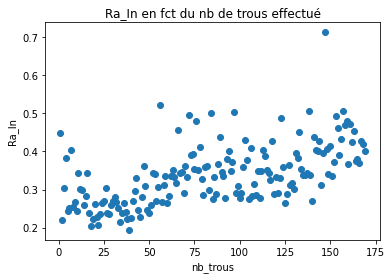

In [5]:
plt.scatter(df1['nb_trous'],df1['Ra_In']) 
plt.title("Ra_In en fct du nb de trous effectué")
plt.xlabel("nb_trous")
plt.ylabel("Ra_In")

- Vérification si nous avons des outliers 

<AxesSubplot:xlabel='Ra_In'>

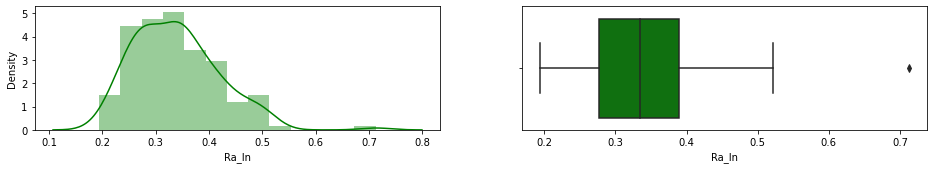

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df1['Ra_In'], color='g')
plt.subplot(2,2,2)
sns.boxplot(df1['Ra_In'],color='g')

- Elimination des outliers

Upper :  0.5557713805
Lower :  0.11031296849999997


<AxesSubplot:xlabel='Ra_In'>

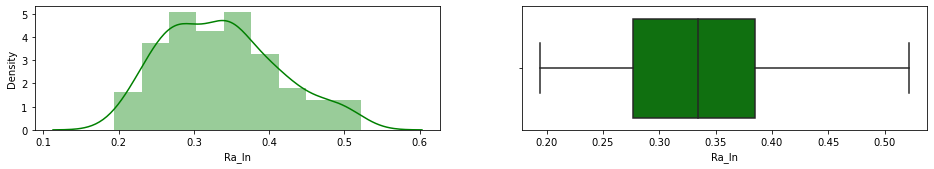

In [7]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 +1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df1, "Ra_In")
print("Upper : ", upper)
print("Lower : ", lower)

df1 = df1[(df1['Ra_In'] > lower) & (df1['Ra_In'] < upper)]
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df1['Ra_In'], color='g')
plt.subplot(2,2,2)
sns.boxplot(df1['Ra_In'],color='g')

In [8]:
df1['Ra_In'].isnull().sum()

0

- nous n'avons pas de valeurs manquantes !!

- Phase d'apprentissage et test 

In [9]:
x = df1['nb_trous']
y = df1['Ra_In']

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train, x_test = x_train.values.reshape([-1, 1]), x_test.values.reshape([-1, 1])

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train , y_train)

## Regression linéaire 

R2:  0.46450754109326076
MAE:  0.04572903112119682
MSE:  0.002816767554470103


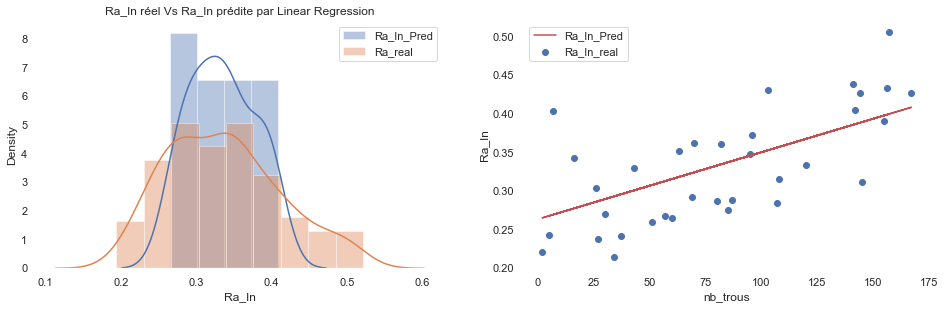

In [12]:
Ra_LR = reg.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Ra_In réel Vs Ra_In prédite par Linear Regression')
sns.distplot(Ra_LR, label='Ra_In_Pred')
sns.distplot(df1['Ra_In'],label='Ra_real')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.plot(x_test, Ra_LR, color = 'r')
plt.xlabel('nb_trous')
plt.ylabel('Ra_In')
plt.legend(['Ra_In_Pred', 'Ra_In_real'])
print("R2: ", r2_score(y_test, Ra_LR))
print("MAE: ", mean_absolute_error(y_test, Ra_LR))
print("MSE: ", mean_squared_error(y_test, Ra_LR))

**Notes :** <br>
Étant donné son interprétabilité et ses propriétés, la MAE peut être utilisée en complément d’autres métriques comme la MSE. Les trois propriétés principales de la MAE sont :

- La MAE pénalise autant les grandes erreurs que les petites erreurs, contrairement à la MSE.
Du fait de l’utilisation d’une valeur absolue dans la somme, une erreur 3 fois plus grande aura 3 fois plus d’impact sur l’erreur.
- Cette métrique est sensible aux outliers.
- L’observation d’une valeur aberrante pénalise le modèle, mais moins que pour la MSE.
- Elle est moins régulière et par conséquent moins optimisable que la MSE.
- La valeur absolue n’est pas dérivable en 0, ce qui rend la MAE plus compliquée à optimiser que la MSE ou la RMSE.

* Pour ce cas, ce n'est pas mal ; MSE est petit !! essayons avec d'autres modèles !!

## KNN

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

## Regression linéaire grid = {'n_neighbors':range(2, 100)}
knn = KNeighborsRegressor()#n_neighbors=30)
clf = GridSearchCV(knn, grid)

clf.fit(x_train, y_train)
#knn.score(x_test, y_test)
print(clf.best_params_, clf.best_score_)

{'n_neighbors': 15} 0.39660521862386044


R2:  0.34554664003782953
MAE:  0.04899228742156862
MSE:  0.003442519048762995


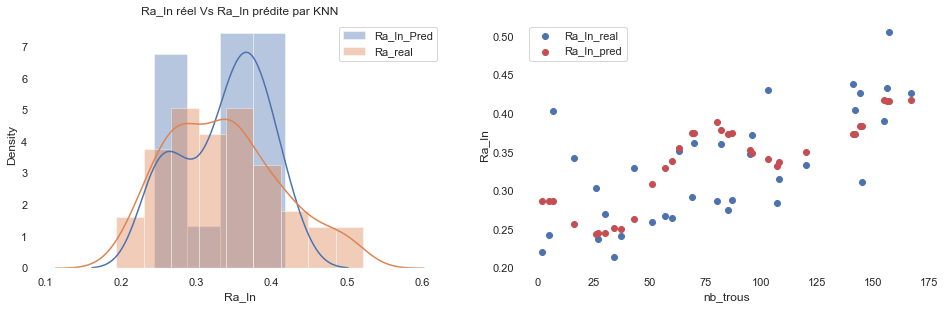

In [20]:
knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(x_train, y_train)
Ra_KNN = knn.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Ra_In réel Vs Ra_In prédite par KNN')
sns.distplot(Ra_KNN, label='Ra_In_Pred')
sns.distplot(df1['Ra_In'],label='Ra_real')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.scatter(x_test, Ra_KNN, color = 'r')
plt.xlabel('nb_trous')
plt.ylabel('Ra_In')
plt.legend(['Ra_In_real', 'Ra_In_pred'])

print("R2: ", r2_score(y_test, Ra_KNN))
print("MAE: ", mean_absolute_error(y_test, Ra_KNN))
print("MSE: ", mean_squared_error(y_test, Ra_KNN))


- KNN est moins performant; MSE a augmenté !! 

## MLP Regressor 

In [19]:
## Regression linéaire param_list = {"hidden_layer_sizes": [(1,),(50,),(100,),(200,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}

mlp = MLPRegressor(max_iter = 500)
clf = GridSearchCV(mlp, param_list)

clf.fit(x_train, y_train)
#knn.score(x_test, y_test)
print(clf.best_params_, clf.best_score_)

{'activation': 'tanh', 'alpha': 0.0005, 'hidden_layer_sizes': (200,), 'solver': 'lbfgs'} 0.4089616493746163


In [21]:
mlp = MLPRegressor(hidden_layer_sizes =  (200,), activation = 'tanh', solver= 'lbfgs', alpha = 0.0005)
mlp.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0005, hidden_layer_sizes=(200,),
             solver='lbfgs')

R2:  0.20786608696387743
MAE:  0.05266255373040901
MSE:  0.0041667386121383


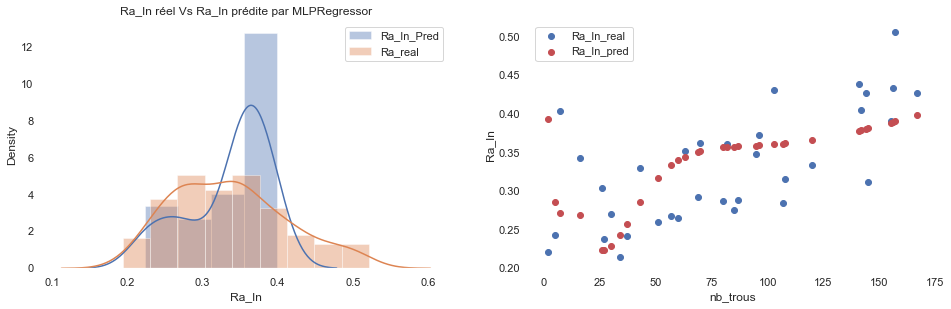

In [22]:
Ra_MLP = mlp.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Ra_In réel Vs Ra_In prédite par MLPRegressor')
sns.distplot(Ra_MLP, label='Ra_In_Pred')
sns.distplot(df1['Ra_In'],label='Ra_real')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.scatter(x_test, Ra_MLP, color = 'r')
plt.xlabel('nb_trous')
plt.ylabel('Ra_In')
plt.legend(['Ra_In_real', 'Ra_In_pred'])

print("R2: ", r2_score(y_test, Ra_MLP))
print("MAE: ", mean_absolute_error(y_test, Ra_MLP))
print("MSE: ", mean_squared_error(y_test, Ra_MLP))

- Le modèle de regression linéaire semble meilleur que MLPRegressor et KNN dans ce cas  !!
- En rajoutant plus d'information : le diamètre par exemple ! 

In [23]:
df1['D_In'] = df['D_In']
df1

,Rz_In_max,Rz_In,Rz_Out_max,Rz_Out,Rz_Cyl_max,Rz_Cyl,Rt_In,Rt_Out,Rt_Cyl,Rq_In,Rq_Out,Rq_Cyl,Ra_In,Ra_Out,Ra_Cyl,nb_trous,D_In
0,13.401611,3.689795,15.642822,8.366699,3.285400,1.166602,13.401611,15.642822,3.285400,1.089762,1.702234,0.475452,0.448711,0.789645,0.256140,1,6361.101
1,3.981934,1.595508,8.959961,4.600293,1.520508,0.819434,3.981934,9.593506,1.585938,0.381823,0.971824,0.307606,0.220629,0.500462,0.234003,2,6360.422
2,9.005859,3.096191,5.461670,2.919873,2.091553,1.253711,9.005859,5.461670,2.428711,0.751598,0.581661,0.503427,0.303455,0.340761,0.349189,3,6361.120
3,10.735352,3.701123,5.484375,2.282275,1.677002,0.904980,10.735352,5.484375,1.704590,0.912857,0.469553,0.341935,0.383415,0.246803,0.228766,4,6361.548
4,2.908203,1.984522,5.995605,3.019238,2.093018,1.121289,2.940918,5.995605,2.238770,0.383894,0.678016,0.412205,0.243155,0.378432,0.302729,5,6361.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,8.149414,3.176514,4.925537,2.940967,5.278320,3.136182,8.149414,4.925537,5.278320,0.675844,0.641977,1.067949,0.381044,0.460986,0.847906,165,6355.081
165,3.376953,1.940430,7.583740,4.512744,3.947021,2.956299,3.558594,7.583740,4.213135,0.516025,0.911454,0.984305,0.370018,0.634709,0.771316,166,6357.184
166,3.328369,2.181885,10.645508,5.325342,4.842285,3.106250,3.328369,10.645508,5.058105,0.550933,0.920838,1.064111,0.427732,0.573641,0.866846,167,6358.094
167,3.165527,2.571728,4.743652,3.694287,21.950195,6.706250,3.623291,4.852783,21.950195,0.571193,0.863619,3.165077,0.419616,0.668535,1.399417,168,6357.664


<AxesSubplot:xlabel='D_In'>

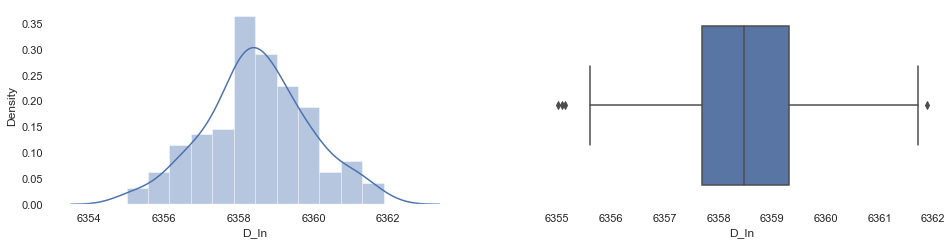

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['D_In'])
plt.subplot(2,2,2)
sns.boxplot(df1['D_In'])

Upper :  6361.726375000002
Lower :  6355.277374999998


<AxesSubplot:xlabel='D_In'>

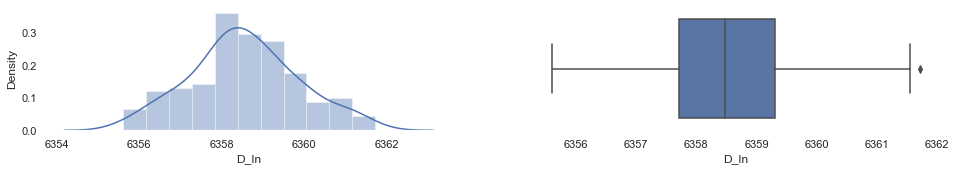

In [25]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 +1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df1, "D_In")
print("Upper : ", upper)
print("Lower : ", lower)

df1 = df1[(df1['D_In'] > lower) & (df1['D_In'] < upper)]
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df1['D_In'])
plt.subplot(2,2,2)
sns.boxplot(df1['D_In'])

In [26]:
df1['D_In'].isnull().sum()

0

In [27]:
d = df.corr()
d['Ra_In'].sort_values(ascending = False)

Ra_In           1.000000
Rq_In           0.876755
Rz_In           0.846110
Rt_In           0.688735
Rz_In_max       0.675147
nb_trous        0.577060
Moy_F_T2&T3     0.534480
Moy_F_T1&T2     0.526803
Max_F_T1&T2     0.525461
Max_F_T3&T4     0.524100
Max_F_T2&T3     0.523916
Moy_F_T3&T4     0.498221
Moy_M_T1&T2     0.494982
Max_M_T1&T2     0.481564
Moy_M_T2&T3     0.410462
P(x)            0.391395
Max_M_T3&T4     0.324460
Ra_Cyl          0.317533
Max_M_T2&T3     0.304681
Et_Consommee    0.302755
Rz_Cyl          0.273606
Moy_M_T3&T4     0.262430
Rq_Cyl          0.216208
Rz_Cyl_max      0.169894
Rt_Cyl          0.167374
Ra_Out          0.135352
Rz_Out          0.116720
Rq_Out          0.112652
Rt_Out          0.098195
Rz_Out_max      0.096872
D_In_max        0.091298
D_Cyl_max      -0.074197
P(y)           -0.087452
D_Out_max      -0.113206
D_Cyl_min      -0.123132
D_Out_min      -0.205915
D_In_min       -0.208693
D_In           -0.256470
D_Cyl          -0.377618
D_Out          -0.413723


- Phase d'apprentissage et test

In [28]:
x = df1[['D_In', 'nb_trous']]
y = df1['Ra_In']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#x_train, x_test = x_train.values.reshape([-1, 1]), x_test.values.reshape([-1, 1])

## KNN

In [30]:
## Regression linéaire from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors':range(2, 100)}
KNN = KNeighborsRegressor()#n_neighbors=30)
clf = GridSearchCV(KNN, grid)

clf.fit(x_train, y_train)
#knn.score(x_test, y_test)
print(clf.best_params_, clf.best_score_)

{'n_neighbors': 15} 0.28042064724611465


R2:  0.5684219698115027
MAE:  0.04114608841414142
MSE:  0.0026533464569204945


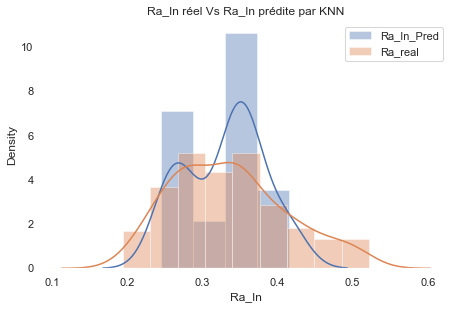

In [46]:
knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(x_train, y_train)
Ra_KNN = knn.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Ra_In réel Vs Ra_In prédite par KNN')
sns.distplot(Ra_KNN, label='Ra_In_Pred')
sns.distplot(df1['Ra_In'],label='Ra_real')
plt.legend()

print("R2: ", r2_score(y_test, Ra_KNN))
print("MAE: ", mean_absolute_error(y_test, Ra_KNN))
print("MSE: ", mean_squared_error(y_test, Ra_KNN))

## Regression linéaire 

In [48]:
from sklearn.linear_model import LinearRegression
regr## Regression linéaire  = LinearRegression().fit(x_train , y_train)

In [49]:
Ra_LR = regr.predict(x_test)

R2:  0.5054109989430267
MAE:  0.04548647985295357
MSE:  0.003040738596015177


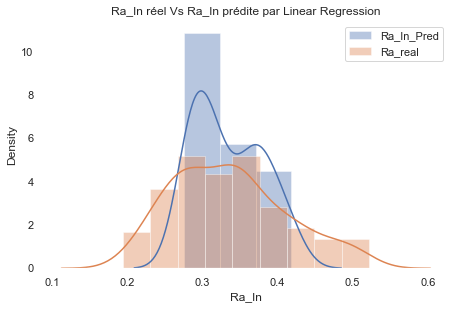

In [58]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Ra_In réel Vs Ra_In prédite par Linear Regression')
sns.distplot(Ra_LR, label='Ra_In_Pred')
sns.distplot(df1['Ra_In'],label='Ra_real')
plt.legend()

print("R2: ", r2_score(y_test, Ra_LR))
print("MAE: ", mean_absolute_error(y_test, Ra_LR))
print("MSE: ", mean_squared_error(y_test, Ra_LR))

In [59]:
## Regression linéaire param_list = {"hidden_layer_sizes": [(1,),(50,),(100,),(200,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}

mlp = MLPRegressor(max_iter = 500)
clf = GridSearchCV(mlp, param_list)

clf.fit(x_train, y_train)
#knn.score(x_test, y_test)
print(clf.best_params_, clf.best_score_)

{'activation': 'relu', 'alpha': 5e-05, 'hidden_layer_sizes': (200,), 'solver': 'lbfgs'} 0.19209677701061798


In [60]:
mlp = MLPRegressor(hidden_layer_sizes =  (200,), activation = 'relu', solver= 'lbfgs', alpha = 0.00005)
mlp.fit(x_train, y_train)

MLPRegressor(alpha=5e-05, hidden_layer_sizes=(200,), solver='lbfgs')

R2:  0.45852827524702044
MAE:  0.04839548814724405
MSE:  0.0033289740948315772


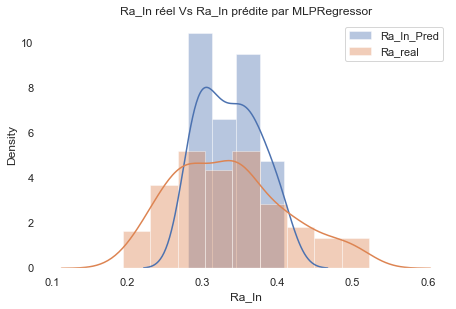

In [61]:
Ra_MLP = mlp.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Ra_In réel Vs Ra_In prédite par MLPRegressor')
sns.distplot(Ra_MLP, label='Ra_In_Pred')
sns.distplot(df1['Ra_In'],label='Ra_real')
plt.legend()

print("R2: ", r2_score(y_test, Ra_MLP))
print("MAE: ", mean_absolute_error(y_test, Ra_MLP))
print("MSE: ", mean_squared_error(y_test, Ra_MLP))

- L'MSE s'est amélioré pour KNN et MLP Regressor en ajoutant D_In. Pourtant, ce n'est pas le même cas pour le modèle de régression linéaire !